#**LAB 7 : Regression Part 2**

In this Lab we will look into the shortcomings of Linear Regression and see how those problems can be solved using Logistic Regression. We will also explore Polynomian Regression

  1. Polynomial Regression
  2. Linear Regression on a specific pattern of data to observe shortcomings
  3. Logistic Regression to solve those problems

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#Polynomial Regression

1. Generate data using relation $y=0.25x^{3}+1.25x^{2}-3x-3$
2. Corrupt y by adding random noise (uniformly sampled)
3. Fit the generated curve using different polynomial order. (Using matrix inversion and gradient descent)

In [2]:
## Use the Regression class defined in the previous lab
import numpy as np
import matplotlib.pyplot as plt

class regression:
  # Constructor
  def __init__(self, name='reg'):
    self.name = name  # Create an instance variable

  def grad_update(self,w_old,lr,y,x):
    w = w_old + (2*lr)*(x@(y-(x.T@w_old)))/(y.shape[0])
    return w

  def error(self,w,y,x):
    return (np.sum(y - (x.T@w)))/(y.shape[0])

  def mat_inv(self,y,x_aug):
    return (np.linalg.pinv(x_aug@x_aug.T))@(x_aug@y)

    # by Gradien descent
  def Regression_grad_des(self,x,y,lr):
    epsilon = 0.000001
    w_old = np.random.rand(x.shape[0],1)
    error1 = 100001.
    error2 = 100000.
    err = []
    while (error1 - error2)>epsilon:
      error1 = self.error(w_old,y,x)
      w_old = self.grad_update(w_old,lr,y,x)
      error2 = self.error(w_old,y,x)
      err.append(error1)
    w_pred = w_old
    return w_pred,err

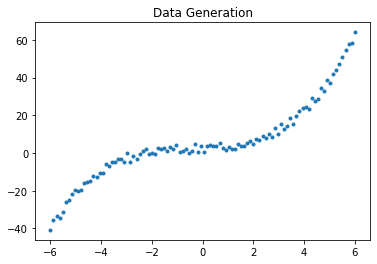

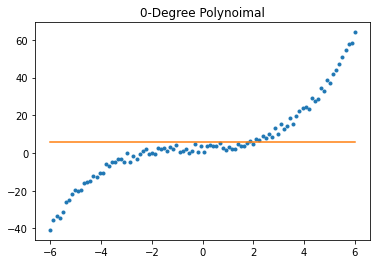

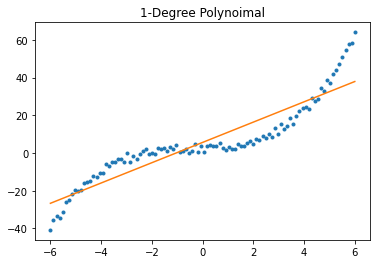

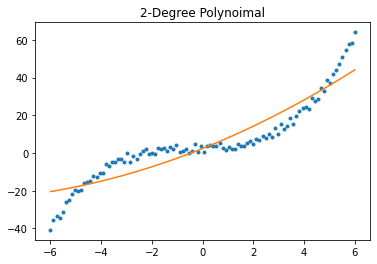

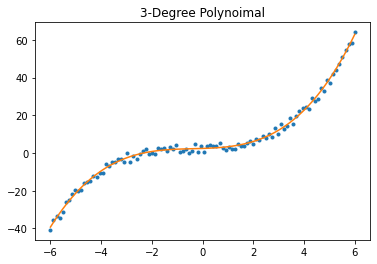

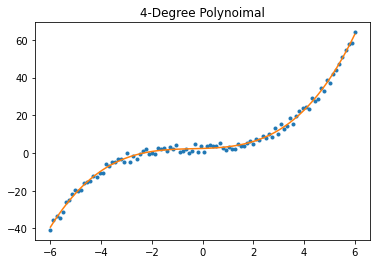

In [3]:
## Data generation

x = np.linspace(-6,6,100)                                                           # Domain of x,y chosen
x = np.array(x)
y = 0.25*(x**3) + 1.25*(x**2) - 3*x - 3                                             # Function of y written
w = np.random.rand(4, 1)

def data_transform(X,degree):                                                       # General regression curve function written
  x_new = []
  for x1 in x:
    j = []
    for i in range(0,degree+1):
      j.append(x1**i)
    x_new.append(j)
  X_new = np.array(x_new)
  return X_new.T

X = data_transform(x,3)                                                             # Scatter Plot for the given function
y = X.T @ w
y = y + 5*np.random.uniform(0, 1, y.shape)

plt.plot(x.T, y, '.')
plt.title('Data Generation')

reg = regression()

# by computation

# for degree 0 polynomial fitting

degree = 0                                                                        # 0 degree for regression
X_1 = data_transform(x,degree)
w_mat = reg.mat_inv(y, X_1)
y_pred = X_1.T @ w_mat
plt.figure()
plt.plot(x.T, y, '.')
plt.plot(x.T, y_pred)
plt.title('0-Degree Polynoimal')

# for degree 1 polynomial fitting

degree = 1                                                                        # 1 degree for regression
X_1 = data_transform(x,degree)
w_mat = reg.mat_inv(y, X_1)
y_pred = X_1.T @ w_mat
plt.figure()
plt.plot(x.T, y, '.')
plt.plot(x.T, y_pred)
plt.title('1-Degree Polynoimal')

# for degree 2 polynomial fitting

degree = 2                                                                        # 2 degree for regression
X_1 = data_transform(x, degree)
w_mat = reg.mat_inv(y, X_1)
y_pred = X_1.T @ w_mat
plt.figure()
plt.plot(x.T, y, '.')
plt.plot(x.T, y_pred)
plt.title('2-Degree Polynoimal')

# for degree 3 polynomial fitting

degree = 3                                                                         # 3 degree for regression
X_1 = data_transform(x, degree)
w_mat = reg.mat_inv(y, X_1)
y_pred = X_1.T @ w_mat
plt.figure()
plt.plot(x.T, y, '.')
plt.plot(x.T, y_pred)
plt.title('3-Degree Polynoimal')

# for degree 4 polynomial fitting

degree = 4                                                                          # 4 degree for regression
X_1 = data_transform(x, degree)
w_mat = reg.mat_inv(y, X_1)
y_pred = X_1.T @ w_mat
plt.figure()
plt.plot(x.T, y, '.')
plt.plot(x.T, y_pred)
plt.title('4-Degree Polynoimal')
plt.show()

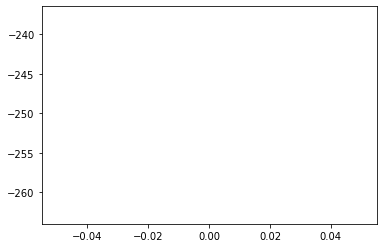

In [4]:
# By Gradient Descent 
lr=0.0001

X_1 = data_transform(x,degree)
w_pred,err=reg.Regression_grad_des(X_1,y,lr)
#print(err)
plt.plot(err)
plt.show()
## Write your code here

# Linear Regression

  Generate the data as shown in the figure below


Shape of x is:  (200,)


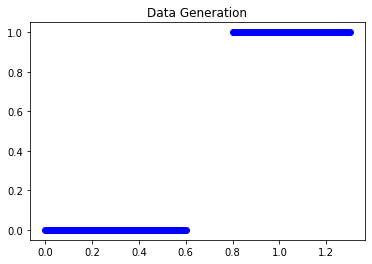

In [5]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
y1=np.zeros(100)
x2=np.linspace(0.8,1.3,100)
y2=np.ones(100)
x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))

print('Shape of x is: ',x.shape)
plt.scatter(x,y,marker='o',c='b')
plt.title('Data Generation')
plt.show()

  Use the Regression class defined in the previous lab to fit the curve

In [6]:
# linear regression class
class lin_regression:

  # Constructor
  def __init__(self, x,y):
    self.x = x  # Create an instance variable
    self.y = y

  # Using Gradient Descent
  def gradient_descent(self,alpha):
    x=self.x
    y=self.y
    m_curr = b_curr = 0
    iterations = 10000
    n = len(x)
    learning_rate = alpha
    cost_arr = []
    it = []

    for i in range(iterations):
        y_predicted = m_curr * x + b_curr
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        cost_arr.append(cost)
        it.append(i)
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
    
    return b_curr,m_curr,cost_arr,it
    
 # Using Matrix Inversion
  def matrix_inversion(self,size):
    x=self.x
    y=self.y
    X = np.asarray(x)
    X = X.reshape(size, 1)
    X=np.hstack((np.ones((size,1)),X))
    Y = np.asarray(y)
    Y = Y.reshape(size, 1)
    print('Shape of x :',Y.shape)
    print('Shape of Augmented x :',X.shape)
    v1 = np.linalg.inv(np.dot(X.T, X))
    v2 = np.dot(X.T, Y)
    v = np.dot(v1,v2)
    print("For matrix inversion b0, b1 : ",v[0],v[1])
    print("For Gradient descent value of b0, b1 : ",b0,b1)
    
    
  def predict(self,b0,b1):
      y_pred = b0+b1*self.x
      plt.plot(self.x,y_pred,label="Regression line")
      plt.scatter(self.x,self.y,marker='o',c=self.y)
      plt.title('Curve Fitting after optimal weights')

  Augment the Data and generate optimal weights

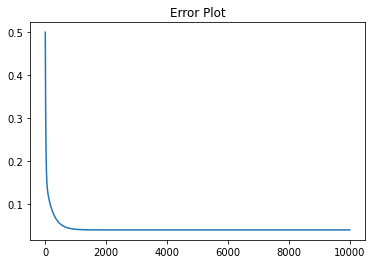

Shape of x : (200, 1)
Shape of Augmented x : (200, 2)
For matrix inversion b0, b1 :  [-0.25988351] [1.12575335]
For Gradient descent value of b0, b1 :  -0.25988350773484636 1.125753344819809


In [7]:
l_r = lin_regression(x,y)
b0,b1,cost_arr,it = l_r.gradient_descent(0.01)
plt.plot(it,cost_arr)
plt.title('Error Plot')
plt.show()
l_r.matrix_inversion(200)

Using the optimal weights, fit the curve

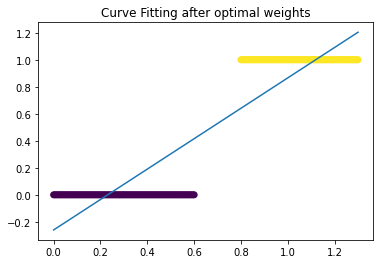

In [8]:
l_r.predict(b0,b1)

# Drawback of Linear regression based Classificaton

  Generate the Data as shown in the figure and follow the same steps as above to fit a curve using regression class 

Shape of x is:  (300,)


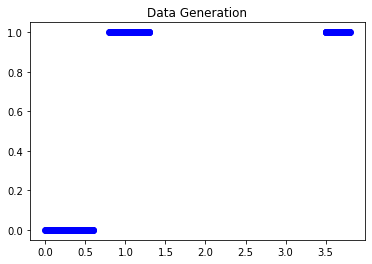

In [9]:
## Write your code here
import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
y1=np.zeros(100)
x2=np.linspace(0.8,1.3,100)
y2=np.ones(100)

x3=np.linspace(3.5,3.8,100)
y3=np.ones(100)

x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))

x=np.concatenate((x,x3))
y=np.concatenate((y,y3))
print('Shape of x is: ',x.shape)
plt.scatter(x,y,marker='o',c='b')
plt.title('Data Generation')
plt.show()

Shape of x : (300, 1)
Shape of Augmented x : (300, 2)
For matrix inversion b0, b1 :  [0.3017071] [0.21897574]
For Gradient descent value of b0, b1 :  0.3016100818217108 0.2190118455502907


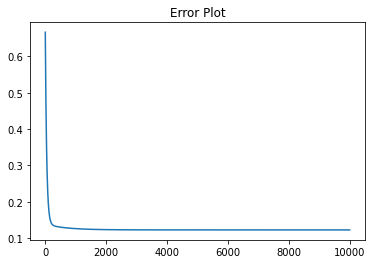

In [10]:
## Write your code here
l_r_2 = lin_regression(x,y)
b0,b1,cost_arr,it = l_r_2.gradient_descent(0.001)
plt.plot(it,cost_arr)
plt.title('Error Plot')
l_r_2.matrix_inversion(300)

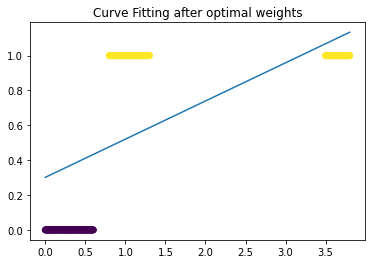

In [11]:
l_r_2.predict(b0,b1)

# Logistic regression

  Error Surface (Comparison between Logistic Loss and Mean Squared Error)

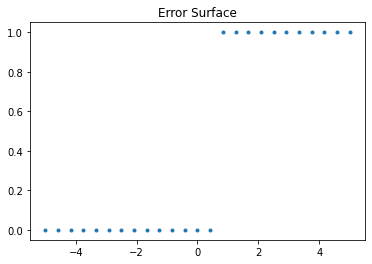

In [12]:
import numpy as np
import matplotlib.pyplot as plt


x=np.linspace(-5,5,25)
y=np.zeros(x.shape)
y[np.where(x>0.7314)]=1

plt.plot(x,y,'.')
plt.title('Error Surface')
plt.show()

1. MSE=$\frac{1}{2N}\sum_{i=1}^{N}(y^{p}_{i}-y_{i})^2$, where $y^{p}=\frac{1}{1+e^{-w^{T}x}}$
2. Logistic loss=$-\frac{1}{N}\sum_{i=1}^{N}y_{i}log(y^{p}_{i})+(1-y_{i})log(1-y_{i}^{p})$

In [13]:
w1_in=10/(x[1]-x[0])
w0=-w1_in*0.7314
w1=np.linspace(-w1_in,4*w1_in,100)
cost_fn_mse=[]
cost_fn_logis=[]
np.seterr(divide='ignore')
for i in range(w1.shape[0]):
  w = []
  w.append(w0)
  w.append(w1[i])
  cost_mse = 0
  for j in range(x.shape[0]):
    cost_mse = cost_mse + (1/(1+np.e**(-(w0+w1[i]*x[j])))-y[j])**2
  cost_mse = cost_mse/(2*x.shape[0])
  cost_fn_mse.append(cost_mse)
  cost_logis = 0
  for j in range(x.shape[0]):
    if y[j]==1:
      cost_logis = cost_logis + (y[j]*(np.log(1/(1+np.e**(-(w0+w1[i]*x[j]))))))
    elif y[j]==0:
      cost_logis = cost_logis + (1-y[j])*(np.log(1-1/(1+np.e**(-(w0+w1[i]*x[j])))))
    else:
      cost_logis = cost_logis + (y[j]*(np.log(1/(1+np.e**(-(w0+w1[i]*x[j]))))) + (1-y[j])*(np.log(1-1/(1+np.e**(-(w0+w1[i]*x[j]))))))
    
  cost_logis = 0-(cost_logis/(x.shape[0]))
  cost_fn_logis.append(cost_logis)

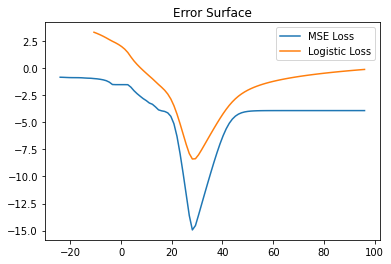

In [14]:
# Ploting of error surface
plt.figure()
plt.plot(w1,np.log(cost_fn_mse),label='MSE Loss')
plt.plot(w1,np.log(cost_fn_logis),label = 'Logistic Loss')
plt.title('Error Surface')
plt.legend()

**Solving the Outlier Issue**

  Generate the Data as shown in the figure

Shape of x is:  (300,)


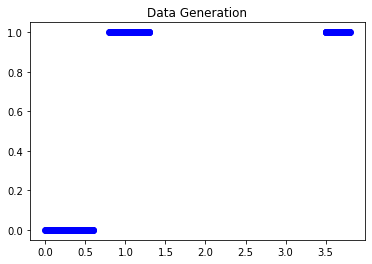

In [15]:
## Write your Code here
import numpy as np
import matplotlib.pyplot as plt
import math

x1=np.linspace(0,0.6,100)
y1=np.zeros(100)
x2=np.linspace(0.8,1.3,100)
y2=np.ones(100)

x3=np.linspace(3.5,3.8,100)
y3=np.ones(100)

x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))

x=np.concatenate((x,x3))
y=np.concatenate((y,y3))

print('Shape of x is: ',x.shape)
plt.scatter(x,y,marker='o',c='b')
plt.title('Data Generation')
plt.show()

Define a Logistic Regression class

In [16]:
# logistic regression class
class logistic_regression:

  # Constructor
  def __init__(self, x,y):
    self.x = x  # Create an instance variable
    self.y = y

  def gradient_descent(self,alpha):
    x=self.x
    y=self.y
    m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = alpha
    cost_arr = []
    it = []

    for i in range(iterations):
        y_predicted = 1/ (1+ np.exp(-(m_curr * x + b_curr)))
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        cost_arr.append(cost)
        it.append(i)
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
    
    return b_curr,m_curr,cost_arr,it
  
    
  def predict(self,b0,b1):
      x=self.x
      y=self.y
      y_pred = b0+b1*x
      y_sig = 1/(1 + np.exp(-y_pred))
      plt.plot(x,y_sig,label="Regression line")
      plt.title('Curve Fitting after optimal weights')
      plt.scatter(x,y,marker='o',c=y)
      

Augment the data and fit the curve by obtaining optimal weights (Using Gradient Descent)

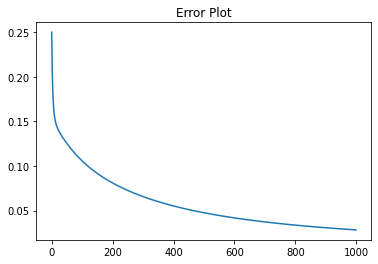

In [17]:
log_r = logistic_regression(x,y)
b0,b1,cost_arr,it = log_r.gradient_descent(0.05)
plt.title('Error Plot')
plt.plot(it,cost_arr)
plt.show()

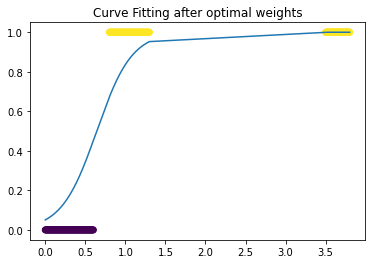

In [18]:
log_r.predict(b0,b1)

# Classification of circularly separated data using logistic regression



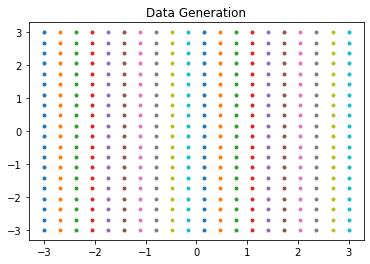

In [19]:
#Generating circularly separated data
x1=np.linspace(-3,3,20)
x2=np.linspace(-3,3,20)

x11,x22=np.meshgrid(x1,x2)
plt.plot(x11,x22,'.')
plt.title('Data Generation')
plt.show()

  Using the above data generate circular data

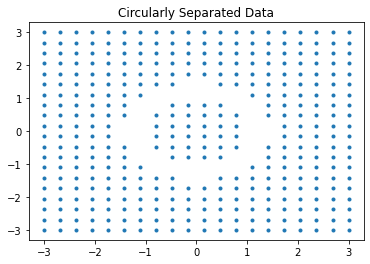

In [20]:
x1=x11.flatten()
x2=x22.flatten()

x=np.concatenate((x1[:,np.newaxis],x2[:,np.newaxis]),axis=1) # to make matrix format

aind=np.where((x[:,0]**(2)+x[:,1]**(2))<=0.9)
bind=np.where((x[:,0]**(2)+x[:,1]**(2))>=2.2)

x1=x[aind[0],:]
x2=x[bind[0],:]

x=np.concatenate((x1,x2))

plt.plot(x[:,0],x[:,1],'.')
plt.title('Circularly Separated Data')
plt.show()

As in case of circularly separated data, the boundary is nonlinear, so squared feature is taken.

In [21]:
class LogisticRegression:
    def _init_(self, name='reg'):
        self.name = name
        
    def sigmoid(self, X, w):
        return 1/(1+ np.exp(-1*np.dot(X, w)))
    
    def grad_update(self, w_old, lr, y, x):
        w = w_old - ((2*lr*(np.dot(x.T, (self.sigmoid(x, w_old)-y)))/x.shape[0]))
        return w
    
    def error(self, w, y, x):
        y_pred = self.sigmoid(x, w)
        h1 = np.where(y_pred==0, 1e-100, y_pred)
        h0 = np.where(y_pred==1, 0.9999999999, y_pred)
        return ((-1*np.sum(y*np.log(h1) + (1 - y)*np.log(1 - h0), axis=0))/x.shape[0])[0]
    
    def Regression_grad_desc(self, x, y, lr, w):
        w_pred = w
        err = []
        for i in range(1000):
            w_pred = self.grad_update(w_pred, lr, y, x)
            err.append(self.error(w_pred, y, x))
            
            if i >= 1 and (err[i-1] - err[i]) <= 10**(-20):
                break
                
        return w_pred,err

Shape of Augmented x : (5, 364)


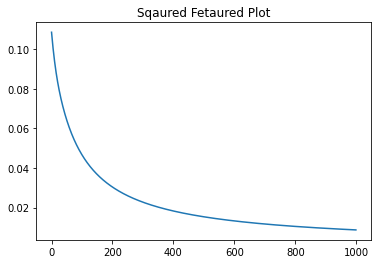

In [22]:
y1=np.zeros((x1.shape[0]))
y2=np.ones((x2.shape[0]))
y=np.concatenate((y1,y2))
y = np.expand_dims(y,axis=-1)
x_aug = np.concatenate((np.ones((1,x.shape[0])),x.T,(x**2).T),axis=0)
print('Shape of Augmented x :',x_aug.shape)

w = np.zeros((x_aug.shape[0], 1))
log_reg = LogisticRegression()
w_pred, err = log_reg.Regression_grad_desc(x_aug.T, y, 0.3, w)
plt.plot(err)
plt.title('Sqaured Fetaured Plot')
plt.show()


Plot classification using 0.5 as threshold

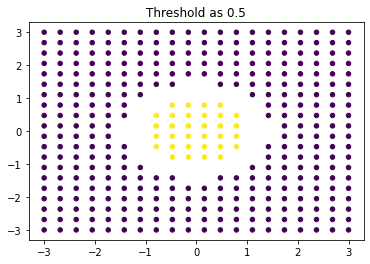

In [23]:
y_sigmoid = log_reg.sigmoid(x_aug.T, w_pred)
y_pred = np.where(y_sigmoid >= 0.5, 0, 1)
plt.scatter(x[:, 0], x[:, 1], s=20, c=y_pred)
plt.title('Threshold as 0.5')
plt.show()

# Multiclass logistic regression

1. Generate 1D data with 3 classes


### One vs rest classification

1. Lets take a polynomial of order 2 (by seeing the data distribution)

Shape of x is:  (300,)


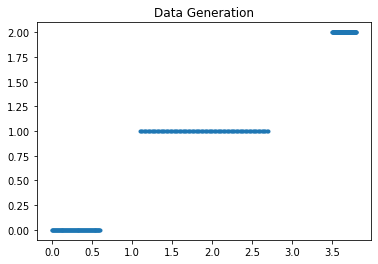

In [44]:
import numpy as np
import matplotlib.pyplot as plt

x1=np.linspace(0,0.6,100)
x2=np.linspace(1.1,2.7,100)
x3=np.linspace(3.5,3.8,100)

x=np.concatenate((x1,x2,x3))

y1=np.zeros(x1.shape)
y2=np.ones(x2.shape)
y3=np.tile([2],x3.shape)

y=np.concatenate((y1,y2,y3))

print('Shape of x is: ',x.shape)
plt.figure()
plt.plot(x,y,'.')
plt.title('Data Generation')
plt.show()

Shape of x is:  (300,)


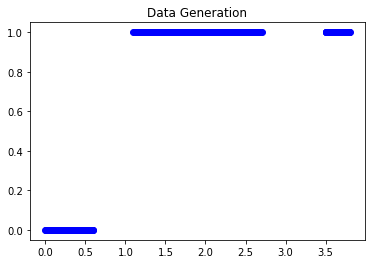

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import math


x1=np.linspace(0,0.6,100)
y1=np.zeros(100)
x2=np.linspace(1.1,2.7,100)
y2=np.ones(100)

x3=np.linspace(3.5,3.8,100)
y3=np.ones(100)

x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))

x=np.concatenate((x,x3))
y=np.concatenate((y,y3))
print('Shape of x is: ',x.shape)
plt.figure()
plt.scatter(x,y,marker='o',c='b')
plt.title('Data Generation')
plt.show()

Using the above function for plotting, plot the curve using different configurations

In [47]:
# logistic regression class
class logistic_regression:

  # Constructor
  def __init__(self, x,y):
    self.x = x  # Create an instance variable
    self.y = y

  def gradient_descent(self,alpha):
    x=self.x
    y=self.y
    b2_curr = m_curr = b_curr = 0
    iterations = 1000
    n = len(x)
    learning_rate = alpha
    cost_arr = []
    it = []

    for i in range(iterations):
        y_predicted = 1/ (1+ np.exp(-(b2_curr * x*x + m_curr * x + b_curr)))
        cost = (1/n) * sum([val**2 for val in (y-y_predicted)])
        cost_arr.append(cost)
        it.append(i)
        b2d = -(2/n)*sum(x*x*(y-y_predicted))
        md = -(2/n)*sum(x*(y-y_predicted))
        bd = -(2/n)*sum(y-y_predicted)
        b2_curr = b2_curr - learning_rate * b2d
        m_curr = m_curr - learning_rate * md
        b_curr = b_curr - learning_rate * bd
      
    
    return b_curr,m_curr,b2_curr,cost_arr,it
  
    
  def predict(self,b0,b1,b2):
      x=self.x
      y=self.y
      y_pred = b0+b1*x+b2*x*x
      y_sig = 1/(1 + np.exp(-y_pred))
      plt.plot(x,y_sig,label="Regression line")
      plt.scatter(x,y,marker='o',c=y)
      plt.show()

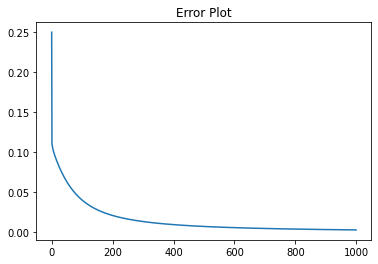

In [48]:
# take class 0 as '0' and other to '1'

log_r = logistic_regression(x,y)
b0,b1,b2,cost_arr,it = log_r.gradient_descent(0.05)
plt.plot(it,cost_arr)
plt.title('Error Plot')
plt.show()

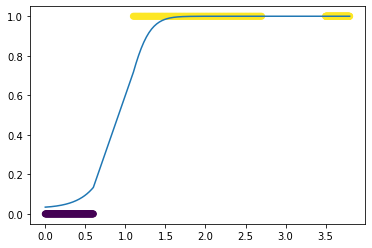

In [49]:
log_r.predict(b0,b1,b2)

Shape of x is:  (300,)


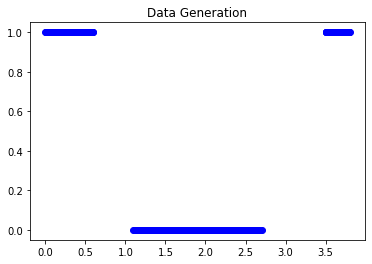

In [50]:
# take class 1 as '0' and other to '1'

import numpy as np
import matplotlib.pyplot as plt
import math

x1=np.linspace(0,0.6,100)
y1=np.ones(100)
x2=np.linspace(1.1,2.7,100)
y2=np.zeros(100)

x3=np.linspace(3.5,3.8,100)
y3=np.ones(100)

x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))

x=np.concatenate((x,x3))
y=np.concatenate((y,y3))

print('Shape of x is: ',x.shape)
plt.figure()
plt.scatter(x,y,marker='o',c='b')
plt.title('Data Generation')
plt.show()

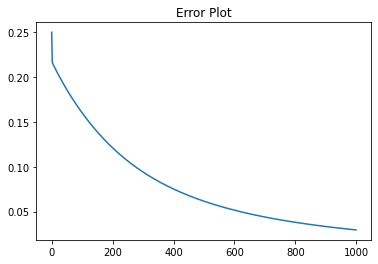

In [51]:
# take class 1 as '0' and other to '1'
log_r = logistic_regression(x,y)
b0,b1,b2,cost_arr,it = log_r.gradient_descent(0.05)
plt.plot(it,cost_arr)
plt.title('Error Plot')
plt.show()

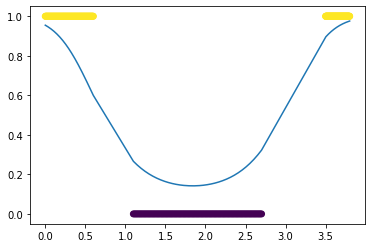

In [52]:
log_r.predict(b0,b1,b2)

Shape of x is:  (300,)


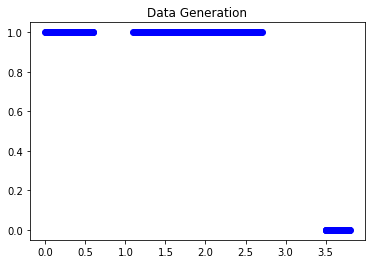

In [54]:
# Take class 2 as '0' and other to '1'
import numpy as np
import matplotlib.pyplot as plt
import math

x1=np.linspace(0,0.6,100)
y1=np.ones(100)
x2=np.linspace(1.1,2.7,100)
y2=np.ones(100)

x3=np.linspace(3.5,3.8,100)
y3=np.zeros(100)

x=np.concatenate((x1,x2))
y=np.concatenate((y1,y2))

x=np.concatenate((x,x3))
y=np.concatenate((y,y3))

print('Shape of x is: ',x.shape)
plt.figure()
plt.scatter(x,y,marker='o',c='b')
plt.title('Data Generation')
plt.show()


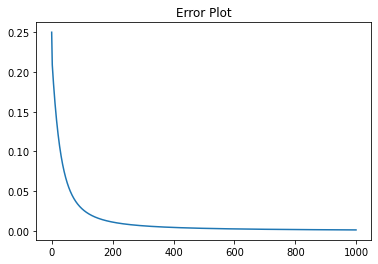

In [55]:
# Take class 2 as '0' and other to '1'
log_r = logistic_regression(x,y)
b0,b1,b2,cost_arr,it = log_r.gradient_descent(0.05)
plt.plot(it,cost_arr)
plt.title('Error Plot')
plt.show()

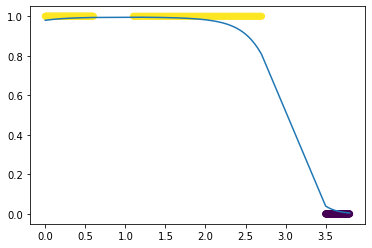

In [56]:
log_r.predict(b0,b1,b2)

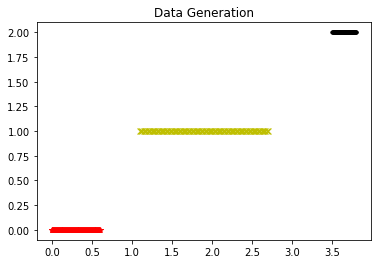

In [58]:
# final classification
# as '0' is taken as referance

plt.figure()
plt.plot(x1,np.zeros(x1.shape),'*',color='r')
plt.plot(x2,np.ones(x2.shape),'x',color='y')
plt.plot(x3,np.tile([2],x3.shape),'.',color='k')

plt.title('Data Generation')
plt.show()